# Tree-based Methods (Métodos Baseados em Árvores)

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo
* Introdução
* Árvores de Decisão
* Árvores de Regressão e Classificação (CART);
* Bagging 
* Random Forests
* Boosting


### Referências

* [An Introduction to Statistical Learning](https://www.statlearning.com/) (ISL) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani
  * Capítulo 8
* [The Elements of Statistical Learning](https://hastie.su.domains/ElemStatLearn/) (ESL) by Trevor Hastie, Robert Tibshirani and Jerome Friedman
  * Capítulos 15, 16


***Disclaimer:*** *O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer feedback ou sugestão de melhoria.*

In [10]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
from IPython.display import Image
from six import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error


# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Set global parameters
plt.style.use('seaborn-v0_8-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

### 1. Introdução

Nesta aula, vamos aprender sobre os métodos baseados em árvores para modelagem estatística e aprendizado de máquina. Abordaremos tanto o aspecto teórico quanto sua aplicação prática, com ênfase nos seguintes pontos:

* Entender como funcionam as Árvores de Regressão e Classificação;
* Explorar as limitações das árvores simples;
* Introduzir métodos mais avançados como Bagging, Random Forests e Boosting.

### 2. Decision Trees (Árvores de Decisão)

***Arvores de Decisão*** envolvem a ***estratificação/segmentação do espaço preditor em várias regiões simples***. Para fazer uma previsão para uma determinada observação, normalmente usamos a média ou o valor da resposta modal para as observações de treinamento na região à qual ela pertence. Como o conjunto de regras de divisão usadas para segmentar o espaço preditor pode ser resumido em uma árvore, esses tipos de abordagens são conhecidos como métodos de árvore de decisão.

#### 2.1. Árvores de Regressão

Vamos entender os conceitos a partir de um exemplo *Predicting Baseball Players’ Salaries Using Regression Trees*.


<div style="text-align:center;">
    <img src="images\Fig_8_1.png"  alt="Imagem" style="width: 650px;"/>
</div>


Nesta sessão, consideraremos o conjunto de dados `Hitters`. Ele consiste em dados individuais de jogadores de beisebol. Em nossas aplicações, estamos interessados ​​em prever os jogadores Salary.

In [28]:
# Load the data
hitters = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters.csv').dropna()
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


5 linhas × 21 colunas

Em particular, estamos interessados ​​em observar como o número de `Hits` e a anos de experiência (`Years`) preveem o `Salary`.

In [29]:
# Get Features
features = ['Years', 'Hits']
X = hitters[features].values
y = np.log(hitters.Salary.values)

Na verdade, usaremos log(salário), pois ele tem uma distribuição mais gaussiana.

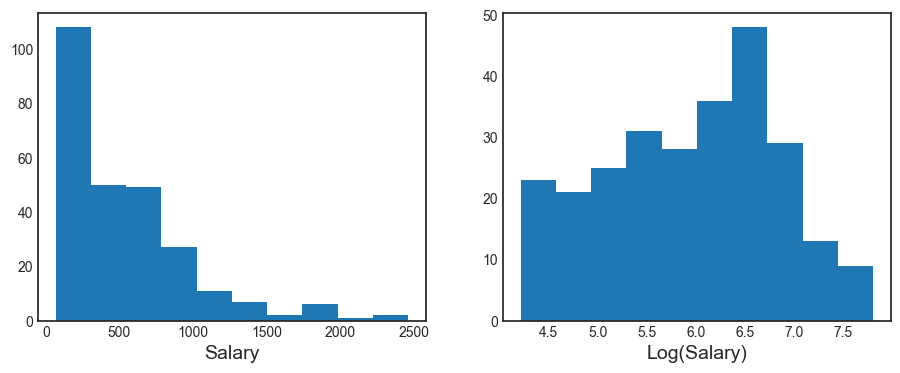

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))

# Plot salary distribution
ax1.hist(hitters.Salary.values)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');

Para entender o que é uma árvore, vamos primeiro dar uma olhada em uma. Ajustamos uma regressão de três com 3 folhas ou, equivalentemente, 2 nós.

In [31]:
# Fit regression tree
tree = DecisionTreeRegressor(max_leaf_nodes=3)
tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

Agora, vamos plotar os resultados visualmente. A maior vantagem das árvores é a interpretabilidade.

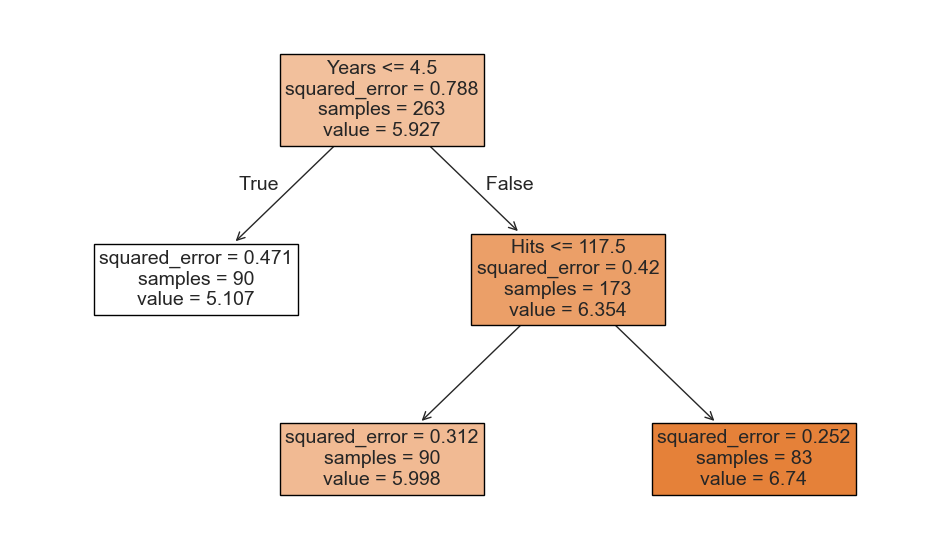

In [32]:
# Figure 8.1
fig, ax = plt.subplots(1,1)
ax.set_title('Figure 8.1');

# Plot tree
plot_tree(tree, filled=True, feature_names=features, fontsize=14, ax=ax);

A árvore consiste em uma série de regras de divisão, começando no topo da árvore. 

A divisão superior atribui observações com Years<4,5 ao ramo esquerdo. 

O salário previsto para esses jogadores é dado pelo valor médio da resposta para os jogadores no conjunto de dados com Years<4,5. Para esses jogadores, o logaritmo médio do salário é 5,107, e, portanto, fazemos uma previsão de 5,107 milhares de dólares, ou seja, US$ 165.174, para esses jogadores. Jogadores com Years>=4,5 são atribuídos ao ramo direito, e então esse grupo é subdividido por Hits.

No geral, a árvore estratifica ou segmenta os jogadores em três regiões do espaço preditor:

jogadores que jogaram por quatro anos ou menos
jogadores que jogaram por cinco ou mais anos e que fizeram menos de 118 rebatidas no ano passado, e
jogadores que jogaram por cinco anos ou mais e que fizeram pelo menos 118 rebatidas no ano passado.
Essas três regiões podem ser escritas como

R1 = {X | Years<4,5}
R2 = {X | Years>=4,5, Hits<117,5}, e
R3 = {X | Years>=4,5, Hits>=117,5}.
Desde a dimensão de
é 2, podemos visualizar o espaço e as regiões em um gráfico bidimensional.

In [33]:
# Figure 8.2
def make_figure_8_2():
    
    # Init
    hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
    plt.title('Figure 8.2')
    plt.xlim(0,25); plt.ylim(ymin=-5);
    plt.xticks([1, 4.5, 24]); plt.yticks([1, 117.5, 238]);

    # Split lines
    plt.vlines(4.5, ymin=-5, ymax=250, color='g')
    plt.hlines(117.5, xmin=4.5, xmax=25, color='g')

    # Regions
    plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
    plt.annotate('R2', xy=(11,60), fontsize='xx-large')
    plt.annotate('R3', xy=(11,170), fontsize='xx-large');

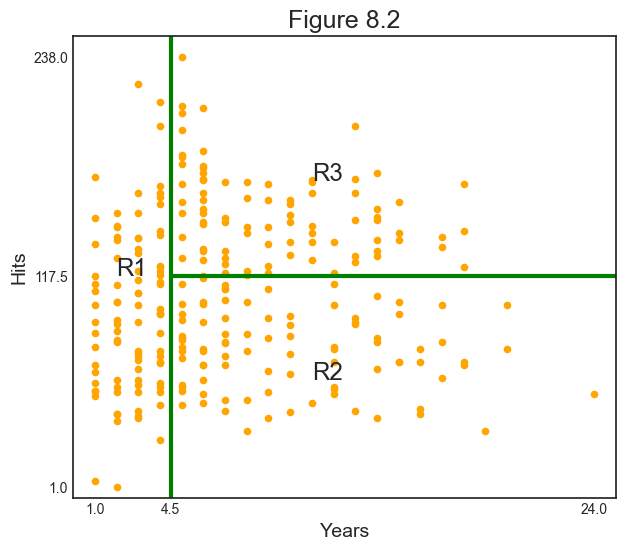

In [34]:
make_figure_8_2()

Podemos interpretar a árvore de regressão acima da seguinte forma: os anos são o fator mais importante na determinação do salário, e jogadores com menos experiência ganham salários mais baixos do que jogadores mais experientes. Dado que um jogador é menos experiente, o número de rebatidas que ele acertou no ano anterior parece ter pouca influência em seu salário. Mas entre jogadores que estão nas ligas principais há cinco anos ou mais, o número de rebatidas no ano anterior afeta o salário, e jogadores que acertaram mais rebatidas no ano anterior tendem a ter salários mais altos.

**Construindo uma Árvore**

Existem duas etapas principais na construção de uma árvore de regressão:

1. Dividimos o espaço preditor, ou seja, o conjunto de valores possíveis para os preditores, em **regiões distintas e não sobrepostas**: $R_1, R_2, ..., R_J$.
2. Para cada observação que cai em uma região $R_j$, fazemos a **mesma previsão**, que é simplesmente a **média dos valores de resposta** para as observações de treinamento que pertencem a $R_j$.

O segundo passo é direto. No entanto, como construir as regiões $R_1, ..., R_J$ de forma ótima?

Nosso objetivo é minimizar a **Soma dos Quadrados dos Resíduos (RSS)** nas diferentes regiões:

$$
\sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
$$

onde $\hat{y}_{R_j}$ representa a média das respostas $y_i$ para todas as observações na região $R_j$.

Infelizmente, é **computacionalmente inviável** considerar todas as possíveis partições do espaço preditor em caixas retangulares para encontrar a melhor árvore.

Por esse motivo, adotamos uma **abordagem gananciosa de cima para baixo**, conhecida como **divisão binária recursiva**:

- É *de cima para baixo* porque começa com todas as observações em uma única região e, a cada etapa, divide recursivamente o espaço preditor.
- É *gananciosa* porque, em cada etapa, realiza a melhor divisão local possível, sem considerar o impacto global da escolha em divisões futuras.

**Algoritmo Prático: Divisão Binária Recursiva**

A cada etapa, fazemos:

1. Selecionamos o preditor $X_j$ e o ponto de corte $s$;
2. Dividimos o espaço preditor nas regiões:
   - $R_1(j, s) = \{ X \mid X_j < s \}$
   - $R_2(j, s) = \{ X \mid X_j \geq s \}$

3. Calculamos a **RSS total** após a divisão:

$$
\sum_{i: x_i \in R_1(j, s)} (y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j, s)} (y_i - \hat{y}_{R_2})^2
$$

4. Repetimos os passos acima para **todos os preditores** e **todos os possíveis valores de corte $s$**, escolhendo aquele que **minimiza a soma total do erro**:

$$
\arg \min_{j, s} \left\{ \sum_{i: x_i \in R_1(j, s)} (y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j, s)} (y_i - \hat{y}_{R_2})^2 \right\}
$$

5. Repetimos esse processo recursivamente, dividindo as regiões formadas, até que alguma **condição de parada** seja atingida (como número mínimo de observações por folha ou profundidade máxima da árvore).

Mais à frente, vamos criar nossa própria classe `Node` em Python para simular e visualizar como as árvores crescem na prática.


In [35]:
class Node:
    """
    Class used to represent nodes in a Regression Tree
    
    Attributes
    ----------
    x : np.array
        independent variables
    y : np.array
        dependent variables
    idxs : np.array
        indexes fo x and y for current node
    depth : int
        depth of the sub-tree (default 5)

    Methods
    -------
    find_next_nodes(self)
        Keep growing the tree
        
    find_best_split(self)
        Find the best split
        
    split(self)
        Split the tree
    """
    
    def __init__(self, x, y, idxs, depth=5):
        """Initialize node"""
        self.x = x
        self.y = y
        self.idxs = idxs 
        self.depth = depth
        self.get_next_nodes()

    def get_next_nodes(self):
        """If the node is not terminal, get further splits"""
        if self.is_last_leaf: return 
        self.find_best_split()       
        self.split()             
        
    def find_best_split(self):
        """Loop over variables and their values to find the best split"""
        best_score = float('inf')
        # Loop over variables
        for col in range(self.x.shape[1]):
            x = self.x[self.idxs, col]
            # Loop over all splits
            for s in np.unique(x):
                lhs = x <= s
                rhs = x > s
                curr_score = self.get_score(lhs, rhs)
                # If best score, save it 
                if curr_score < best_score: 
                    best_score = curr_score
                    self.split_col = col
                    self.split_val = s
        return self
    
    def get_score(self, lhs, rhs):
        """Get score of a given split"""
        y = self.y[self.idxs]
        lhs_mse = self.get_mse(y[lhs])
        rhs_mse = self.get_mse(y[rhs])
        return lhs_mse * lhs.sum() + rhs_mse * rhs.sum()
        
    def get_mse(self, y): return np.mean((y-np.mean(y))**2)
    
    def split(self): 
        """Split a node into 2 sub-nodes (recursive)"""
        x = self.x[self.idxs, self.split_col]
        lhs = x <= self.split_val
        rhs = x > self.split_val
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.depth-1)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.depth-1)
        to_print = (self.depth, self.split_col, self.split_val, sum(lhs), sum(rhs))
        print('Split on layer %.0f: var%1.0f = %.4f (%.0f/%.0f)' % to_print)
        return self
    
    @property
    def is_last_leaf(self): return self.depth<=1

Qual é a aparência de um Nó?

In [14]:
# Init first node
tree1 = Node(X, y, np.arange(len(y)), 1)

# Documentation (always comment and document your code!)
print(tree1.__doc__)


    Class used to represent nodes in a Regression Tree
    
    Attributes
    ----------
    x : np.array
        independent variables
    y : np.array
        dependent variables
    idxs : np.array
        indexes fo x and y for current node
    depth : int
        depth of the sub-tree (default 5)

    Methods
    -------
    find_next_nodes(self)
        Keep growing the tree
        
    find_best_split(self)
        Find the best split
        
    split(self)
        Split the tree
    


Quais propriedades ele possui?

In [15]:
# Inspect the class
dir(tree1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'depth',
 'find_best_split',
 'get_mse',
 'get_next_nodes',
 'get_score',
 'idxs',
 'is_last_leaf',
 'split',
 'x',
 'y']

Qual é a profundidade? Quantas observações existem?

In [16]:
# Get info
print('Tree of depth %.0f with %.0f observations' % (tree1.depth, len(tree1.idxs)))

Tree of depth 1 with 263 observations


Tudo bem, a árvore é apenas uma folha.

In [17]:
# Check if terminal
tree1.is_last_leaf

True

Vamos encontrar a primeira divisão.

In [18]:
# Find best split
tree1.find_best_split()
print('Split at var%1.0f = %.4f' % (tree1.split_col, tree1.split_val))

Split at var0 = 4.0000


e tiver selecionado a primeira variável, no valor
.

Se chamarmos a função split, ela também nos dirá quantas observações por folha a divisão gera.

In [19]:
# Split tree
tree1.split();

Split on layer 1: var0 = 4.0000 (90/173)


Agora estamos prontos para calcular árvores ainda mais profundas

In [20]:
# Check depth-3 tree
tree3 = Node(X, y, np.arange(len(y)), 3)

Split on layer 2: var1 = 4.0000 (2/88)
Split on layer 2: var1 = 117.0000 (90/83)
Split on layer 3: var0 = 4.0000 (90/173)


### Poda

O processo descrito acima pode produzir boas previsões no conjunto de treinamento, mas provavelmente sobreajustará os dados, levando a um desempenho ruim do conjunto de teste. Isso ocorre porque a árvore resultante pode ser muito complexa. Uma árvore menor, com menos divisões, pode levar a uma menor variância e melhor interpretação, mas com um pequeno viés.

Podemos ver isso acontecendo se construirmos a mesma árvore acima, mas com 5 folhas.

In [21]:
# Compute tree
overfit_tree = DecisionTreeRegressor(max_leaf_nodes=5).fit(X, y)

Nós plotamos a árvore de 5 folhas.

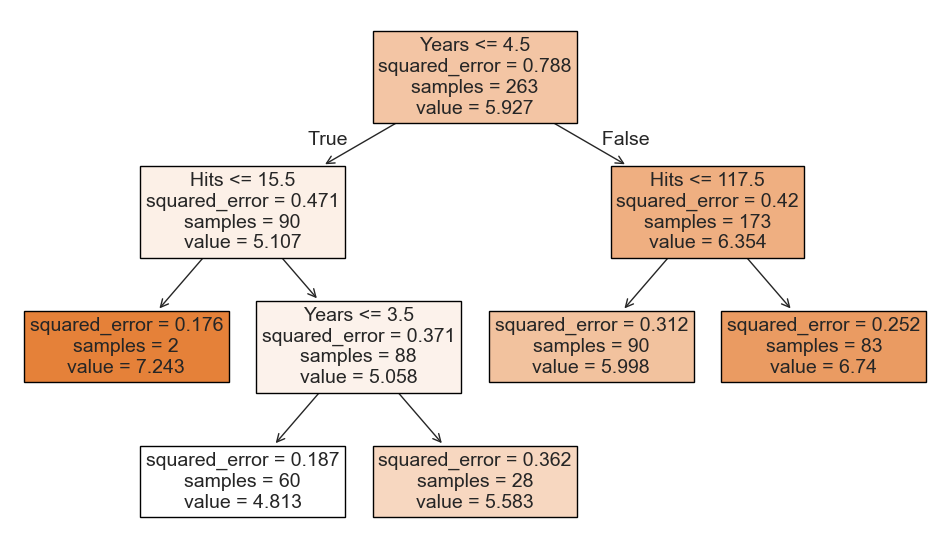

In [22]:
# Plot tree
fig, ax = plt.subplots(1,1)
plot_tree(overfit_tree, filled=True, feature_names=features, fontsize=14, ax=ax);

A divisão na extrema esquerda prevê um valor muito alto Salary(7,243) para jogadores com pouca Yearsexperiência e poucos Hits. De fato, essa previsão se baseia em uma subamostra extremamente pequena (2). Eles provavelmente são outliers e nossa árvore provavelmente está superajustada.

Uma alternativa possível é inserir um número mínimo de observações por folha.

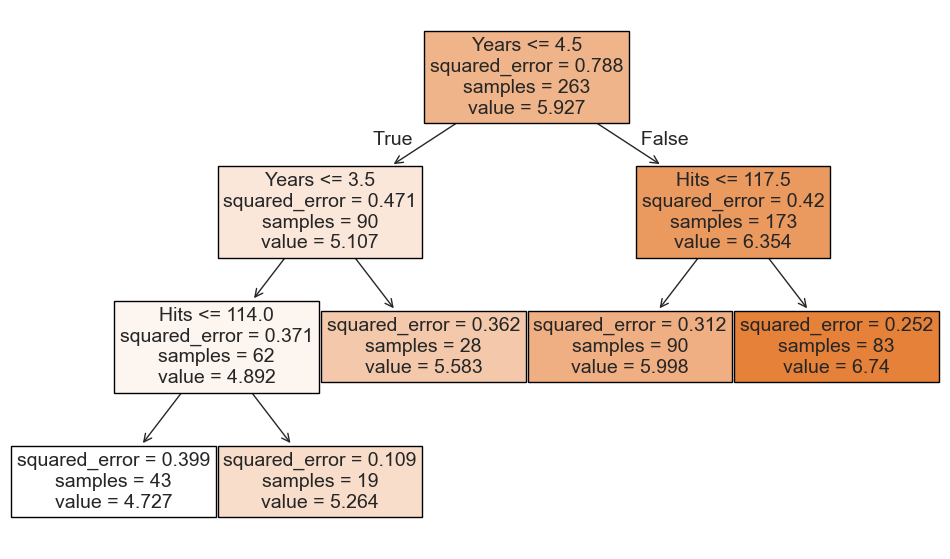

In [23]:
# Compute tree
no_overfit_tree = DecisionTreeRegressor(max_leaf_nodes=5, min_samples_leaf=10).fit(X, y)

# Plot tree
fig, ax = plt.subplots(1,1)
plot_tree(no_overfit_tree, filled=True, feature_names=features, fontsize=14, ax=ax);

Agora a árvore faz muito mais sentido: quanto menor o Yearse o Hits, menor o previsto Salary, como podemos ver pelos tons ficando cada vez mais escuros à medida que nos movemos da esquerda para a direita

Outra alternativa possível ao processo descrito acima é construir a árvore somente enquanto a diminuição no RSS devido a cada divisão exceder algum limite (alto).

Essa estratégia resultará em árvores menores, mas é muito míope, pois uma divisão aparentemente inútil no início da árvore pode ser seguida por uma divisão muito boa, ou seja, uma divisão que leva a uma grande redução no RSS mais tarde.

Podemos usar a validação cruzada para escolher o comprimento ideal da árvore.

In [24]:
# Import original split
features = ['Years', 'Hits', 'RBI', 'PutOuts', 'Walks', 'Runs', 'AtBat', 'HmRun']
X_train = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_X_train.csv').dropna()[features]
X_test = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_X_test.csv').dropna()[features]
y_train = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_y_train.csv').dropna()
y_test = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_y_test.csv').dropna()

In [25]:
# Init
params = range(2,11)
reg_scores = np.zeros((len(params),3))
best_score = 10**6

# Loop over all parameters
for i,k in enumerate(params):
    
    # Model
    tree = DecisionTreeRegressor(max_leaf_nodes=k)

    # Loop over splits
    tree.fit(X_train, y_train)
    reg_scores[i,0] = mean_squared_error(tree.predict(X_train), y_train)
    reg_scores[i,1] = mean_squared_error(tree.predict(X_test), y_test)

    # Get CV score
    kf6 = KFold(n_splits=6)
    reg_scores[i,2] = -cross_val_score(tree, X_train, y_train, cv=kf6, scoring='neg_mean_squared_error').mean()
    
    # Save best model
    if reg_scores[i,2]<best_score:
        best_model = tree
        best_score = reg_scores[i,2]

Vamos traçar a profundidade ideal da árvore usando cv de 6 vezes.

In [26]:
# Figure 8.5
def make_figure_8_5():
    
    # Init
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
    fig.suptitle('Figure 8.5')

    # Plot scores
    ax1.plot(params, reg_scores);
    ax1.axvline(params[np.argmin(reg_scores[:,2])], c='k', ls='--')
    ax1.legend(['Train','Test','6-fold CV']);
    ax1.set_title('Cross-Validation Scores');

    # Plot best tree
    plot_tree(best_model, filled=True, impurity=False, feature_names=features, fontsize=12, ax=ax2);
    ax2.set_title('Best Model');

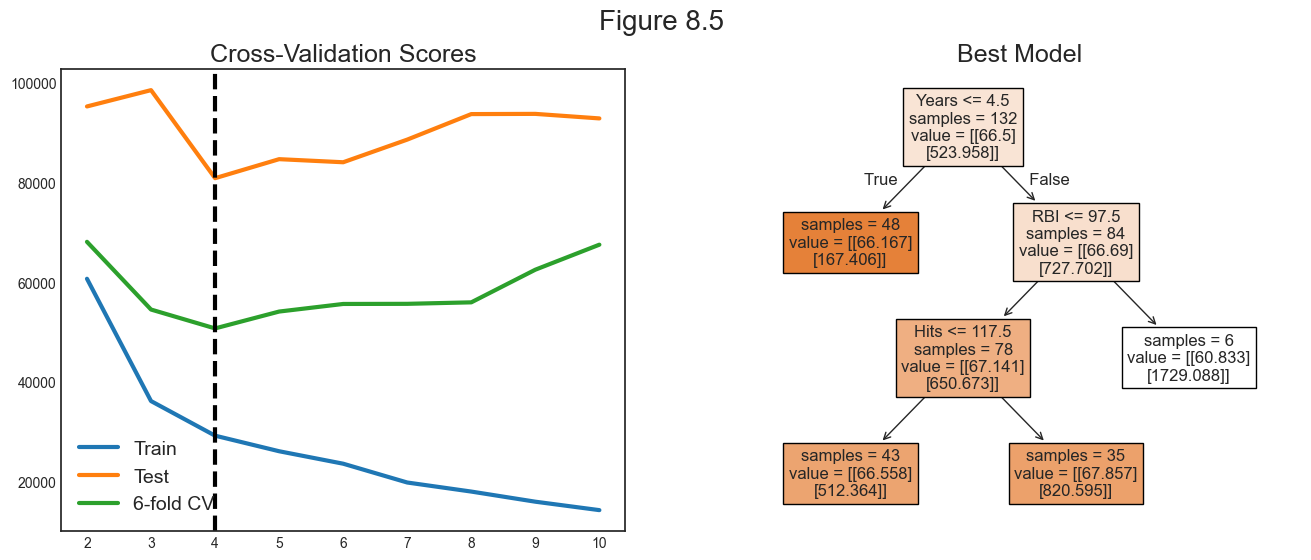

In [27]:
make_figure_8_5()

### Árvores de Classificação


Uma árvore de classificação é muito semelhante a uma árvore de regressão, exceto que ela é usada para prever uma resposta qualitativa em vez de quantitativa.

Para uma árvore de classificação, prevemos que cada observação pertence à classe de observações de treinamento mais comum na região à qual ela pertence.

Construindo uma Árvore de Classificação
A tarefa de desenvolver uma árvore de classificação é semelhante à de desenvolver uma árvore de regressão. No entanto, no contexto de classificação, o RSS não pode ser usado como critério para realizar as divisões binárias.

Nós definimos
como a proporção de observações de treinamento no
região que são da
classe. Possíveis funções de perda para decidir as divisões são:

Taxa de erro de classificação
$$ E = 1 - \max {k}\esquerda(\hat{p} {mk}\direita) $$

Índice de Gini
$$ G=\sum_{k=1}^{K} \hat{p} {mk}\esquerda(1-\hat{p} {mk}\direita) $$

Entropia
$$ D=-\sum_{k=1}^{K} \hat{p} {mk} \log \hat{p} {mk} $$

Em problemas de classificação de 2 classes, é assim que as diferentes pontuações se parecem, para diferentes proporções da classe 2 (
), quando a verdadeira proporção é
.

Desenho
Ao construir uma árvore de classificação, o índice de Gini ou a entropia são normalmente usados ​​para avaliar a qualidade de uma divisão específica, já que essas duas abordagens são mais sensíveis à pureza do nó do que a taxa de erro de classificação.

Nesta seção, trabalharemos com o Heartconjunto de dados sobre insuficiências cardíacas individuais. Tentaremos usar características individuais para prever doenças cardíacas ( HD). A variável é binária: Sim, Não.

In [30]:
# Load heart dataset
heart = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [31]:
# Fastorize variables
heart.ChestPain = pd.factorize(heart.ChestPain)[0]
heart.Thal = pd.factorize(heart.Thal)[0]

In [32]:
# Set features
features = [col for col in heart.columns if col!='AHD']
X2 = heart[features]
y2 = pd.factorize(heart.AHD)[0]

Agora ajustamos nosso classificador.

In [33]:
# Fit classification tree
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=11)
clf.fit(X2,y2)

DecisionTreeClassifier(max_leaf_nodes=11)

Qual é a pontuação?

In [34]:
# Final score
clf.score(X2,y2)

0.8686868686868687

Vamos dar uma olhada na árvore inteira.

In [35]:
# Figure 8.6 a
def make_fig_8_6a():
    
    # Init
    fig, ax = plt.subplots(1,1, figsize=(16,12))
    ax.set_title('Figure 8.6');

    # Plot tree
    plot_tree(clf, filled=True, feature_names=features, class_names=['No','Yes'], fontsize=12, ax=ax);

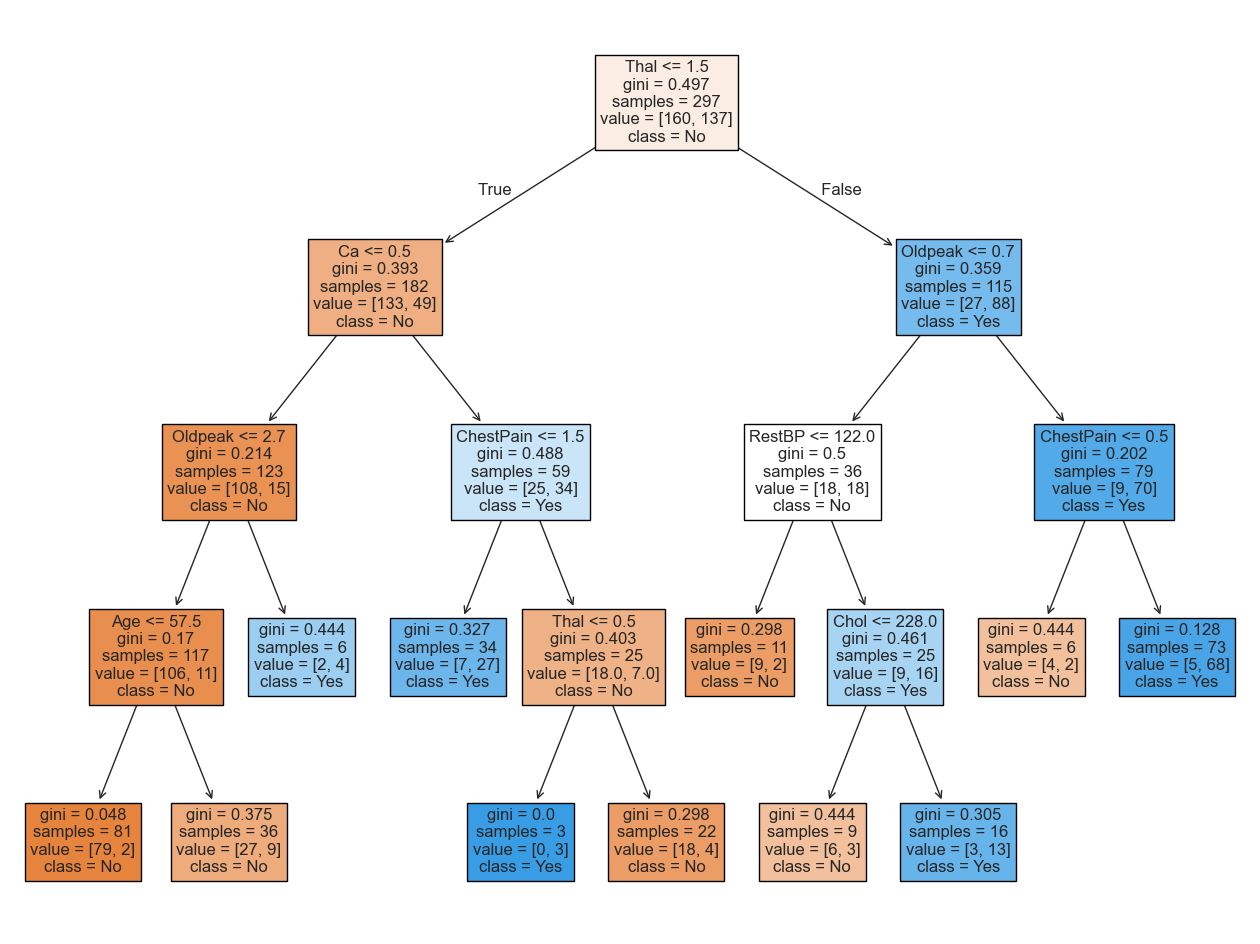

In [36]:
make_fig_8_6a()

Esta figura tem uma característica surpreendente: algumas das divisões produzem dois nós terminais que têm o mesmo valor previsto.

Por exemplo, considere a divisão Age<=57,5 próxima ao canto inferior esquerdo da árvore não podada. Independentemente do valor de Age, um valor de resposta de Não é previsto para essas observações. Por que, então, a divisão é realizada?

A divisão é realizada porque leva ao aumento da pureza do nó. Ou seja, 2/81 das observações correspondentes à folha da esquerda têm um valor de resposta de Sim , enquanto 9/36 daquelas correspondentes à folha da direita têm um valor de resposta de Sim . Por que a pureza do nó é importante? Suponha que temos uma observação de teste que pertence à região dada por essa folha da esquerda. Então podemos ter quase certeza de que seu valor de resposta é Não . Em contraste, se uma observação de teste pertence à região dada pela folha da direita, então seu valor de resposta é provavelmente Não , mas temos muito menos certeza. Mesmo que a divisão Age<=57,5 não reduza o erro de classificação, ela melhora o índice de Gini e a entropia, que são mais sensíveis à pureza do nó.

### Poda para Classificação

Podemos repetir o exercício de poda também para a tarefa de classificação.

In [37]:
# Figure 8.6 b
def make_figure_8_6b():
    
    # Init
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle('Figure 8.6')

    # Plot scores
    ax1.plot(params, clf_scores);
    ax1.legend(['Train','Test','6-fold CV']);

    # Plot best tree
    plot_tree(best_model, filled=True, impurity=False, feature_names=features, fontsize=12, ax=ax2);

In [38]:
# Init
J = 10
params = range(2,11)
clf_scores = np.zeros((len(params),3))
best_score = 100

# Loop over all parameters
for i,k in enumerate(params):
    
    # Model
    tree = DecisionTreeClassifier(max_leaf_nodes=k)
    
    # Loop J times
    temp_scores = np.zeros((J,3))
    for j in range (J):

        # Loop over splits
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=j)
        m = tree.fit(X2_train, y2_train)
        temp_scores[j,0] = mean_squared_error(m.predict(X2_train), y2_train)
        temp_scores[j,1] = mean_squared_error(m.predict(X2_test), y2_test)

        # Get CV score
        kf6 = KFold(n_splits=6)
        temp_scores[j,2] = -cross_val_score(tree, X2_train, y2_train, cv=kf6, scoring='neg_mean_squared_error').mean()
        
        # Save best model
        if temp_scores[j,2]<best_score:
            best_model = m
            best_score = temp_scores[j,2]
        
    # Average
    clf_scores[i,:] = np.mean(temp_scores, axis=0)

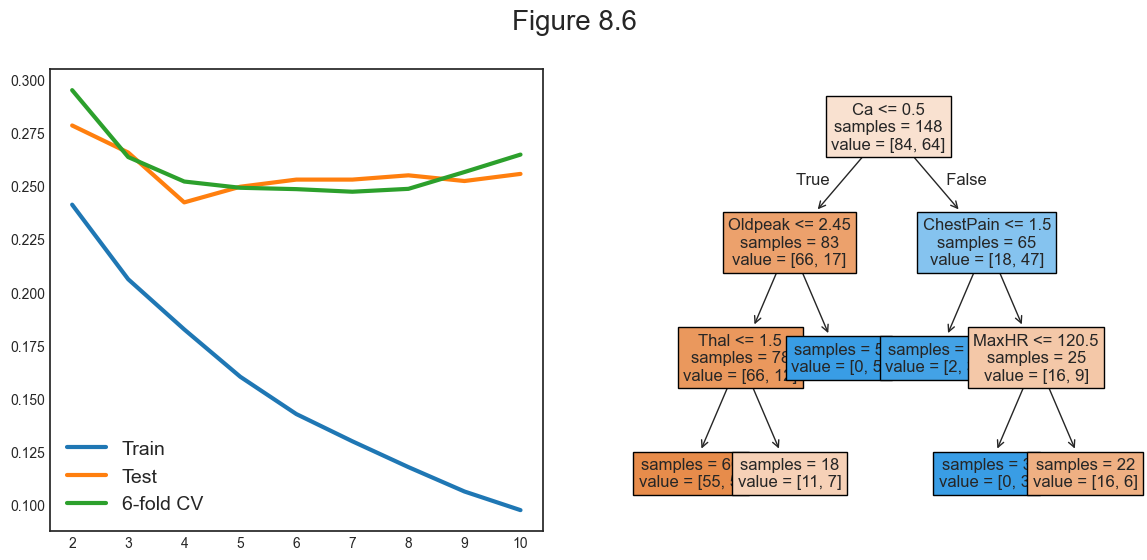

In [39]:
make_figure_8_6b()

Outras questões
Valores preditivos ausentes
Geralmente há duas maneiras principais de lidar com valores ausentes:

descartar as observações
preencha os valores ausentes com previsões usando as outras observações (por exemplo, média)
Com árvores podemos fazer melhor:

codificá-los como uma classe separada (por exemplo, 'ausente')
gerar divisões usando dados não ausentes e usar variáveis ​​não ausentes em dados ausentes para imitar as divisões com dados ausentes
Preditores Categóricos
Ao dividir um preditor com q valores possíveis não ordenados, há
possíveis partições dos valores q em dois grupos, e os cálculos tornam-se proibitivos para grandes
. No entanto, com um
resultado, esse cálculo simplifica.

Divisões de Combinação Linear
Em vez de restringir as divisões para serem do tipo
, pode-se permitir divisões ao longo de combinações lineares da forma
. Os pesos
tornar-se parte do procedimento de otimização.

Outros procedimentos de construção de árvores
O procedimento que vimos para construir árvores é chamado CART (Árvore de Classificação e Regressão). Existem outros procedimentos.

A Matriz de Perdas
Em relação a outros métodos, a escolha das funções de perda desempenha um papel muito mais importante.

Divisões binárias
Você pode fazer divisões não binárias, mas no final elas são apenas versões mais fracas das divisões binárias.

Instabilidade
As árvores têm uma variância muito alta .

Dificuldade em capturar a estrutura aditiva
Árvores são muito ruins em modelar estruturas aditivas.

Falta de suavidade
As árvores não são lisas.

Árvores vs Regressão
Vantagens

Árvores são muito fáceis de explicar às pessoas. Aliás, são ainda mais fáceis de explicar do que a regressão linear!
Algumas pessoas acreditam que as árvores de decisão refletem mais de perto a tomada de decisão humana do que as abordagens de regressão e classificação vistas nos capítulos anteriores.
As árvores podem ser exibidas graficamente e são facilmente interpretadas até mesmo por um não especialista (especialmente se forem pequenas).
As árvores podem manipular facilmente preditores qualitativos sem a necessidade de criar variáveis ​​fictícias.
Desvantagens

árvores geralmente não têm o mesmo nível de precisão preditiva que algumas das outras abordagens de regressão e classificação vistas neste livro.
Árvores podem ser muito pouco robustas. Em outras palavras, uma pequena alteração nos dados pode causar uma grande alteração na árvore estimada final.

### 7 Bagging, Florestas Aleatórias, Boosting


Bagging, florestas aleatórias e boosting usam árvores como blocos de construção para construir modelos de previsão mais poderosos.

Ensacamento
O principal problema das árvores de decisão é que elas sofrem com alta variância . A agregação bootstrap , ou bagging , é um procedimento de uso geral para reduzir a variância de um método de aprendizado estatístico.

A ideia principal por trás do bagging é que, dado um conjunto de n observações independentes
, cada um com variância
, a variância da média
das observações é dado por
. Em outras palavras, calcular a média de um conjunto de observações reduz a variância.

De fato, o bagging consiste em pegar muitos conjuntos de treinamento da população, construir um modelo de previsão separado usando cada conjunto de treinamento e calcular a média das previsões resultantes . Como não temos acesso a muitos conjuntos de treinamento, recorremos ao bootstrapping.

Estimativa de erro fora da sacola
Acontece que existe uma maneira muito simples de estimar o erro de teste de um modelo ensacado, sem a necessidade de realizar validação cruzada ou a abordagem do conjunto de validação. Lembre-se de que a chave para o ensaque é que as árvores são repetidamente ajustadas a subconjuntos bootstrapped das observações. Pode-se mostrar que, em média, cada árvore ensacada utiliza cerca de dois terços das observações. O terço restante das observações não utilizadas para ajustar uma determinada árvore ensacada são chamadas de observações fora do ensaque (OOB). Podemos prever a resposta para a i-ésima observação usando cada uma das árvores nas quais essa observação foi OOB.

Agora vamos calcular o índice de Gini para o Heartconjunto de dados usando diferentes números de árvores.

In [40]:
# Init (takes a lot of time with J=30)
params = range(2,50)
bagging_scores = np.zeros((len(params),2))
J = 30;

# Loop over parameters
for i, k in enumerate(params):
    print("Computing k=%1.0f" % k, end ="")
    
    # Repeat J 
    temp_scores = np.zeros((J,2))
    for j in range(J):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=j)
        bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=k, oob_score=True)
        bagging.fit(X2_train,y2_train)
        temp_scores[j,0] = bagging.score(X2_test, y2_test)
        temp_scores[j,1] = bagging.oob_score_
        
    # Average
    bagging_scores[i,:] = np.mean(temp_scores, axis=0)
    print("", end="\r")

Vamos traçar o erro Out-of-Bag calculado durante a geração do estimador ensacado.

In [41]:
# Make new figure 1
def make_new_figure_1():
    
    # Init
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    fig.suptitle("Estimated $R^2$")

    # Plot scores
    ax.plot(params, bagging_scores);
    ax.legend(['Test','OOB']);
    ax.set_xlabel('Number of Trees'); ax.set_ylabel('R^2');

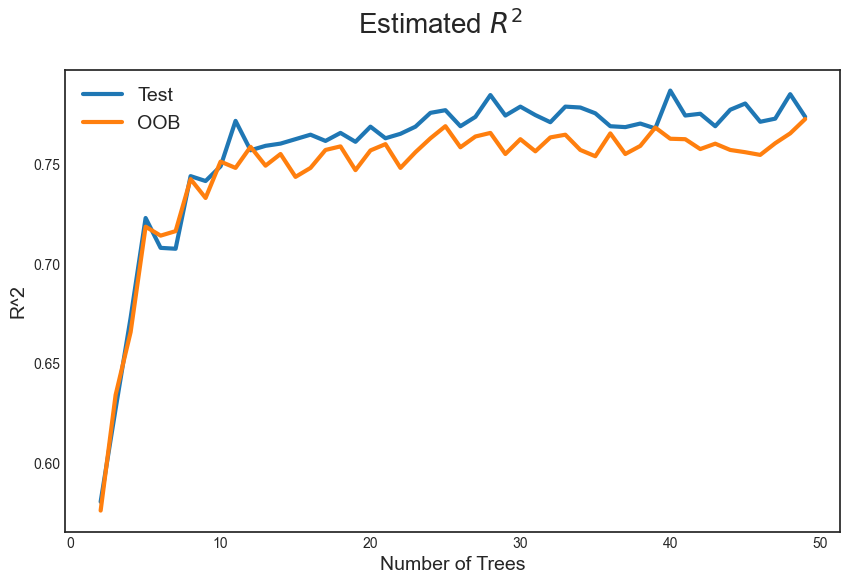

In [42]:
make_new_figure_1()

Pode-se demonstrar que, com B suficientemente grande, o erro OOB é virtualmente equivalente ao erro de validação cruzada "leave-one-out". A abordagem OOB para estimar o erro de teste é particularmente conveniente ao realizar bagging em grandes conjuntos de dados para os quais a validação cruzada seria computacionalmente onerosa.

### Medidas de Importância Variável

Como discutimos, a principal vantagem do bagging é reduzir a variância da previsão. No entanto, com o bagging, pode ser difícil interpretar o modelo resultante. Na verdade, não podemos mais desenhar árvores, pois temos muitas delas.

No entanto, é possível obter um resumo geral da importância de cada preditor usando o RSS (para árvores de regressão bagging) ou o índice de Gini (para árvores de classificação bagging). No caso de árvores de regressão bagging, podemos registrar a quantidade total de redução do RSS devido a divisões em um determinado preditor, calculada a média de todas as árvores. Um valor alto indica um preditor importante. Da mesma forma, no contexto de árvores de classificação bagging, podemos somar a quantidade total de redução do índice de Gini devido a divisões em um determinado preditor, calculada a média de todas as árvores.

In [43]:
# Compute feature importance
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)

Podemos dar uma olhada na importância de cada característica.

In [44]:
# Figure 8.9
def make_figure_8_9():
    
    # Init
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.set_title('Figure 8.9: Feature Importance');

    # Plot feature importance
    h1 = pd.DataFrame({'Importance':feature_importances*100}, index=features)
    h1 = h1.sort_values(by='Importance', axis=0, ascending=False)
    h1.plot(kind='barh', color='r', ax=ax)
    ax.set_xlabel('Variable Importance'); 
    plt.yticks(fontsize=14);
    plt.gca().legend_ = None;

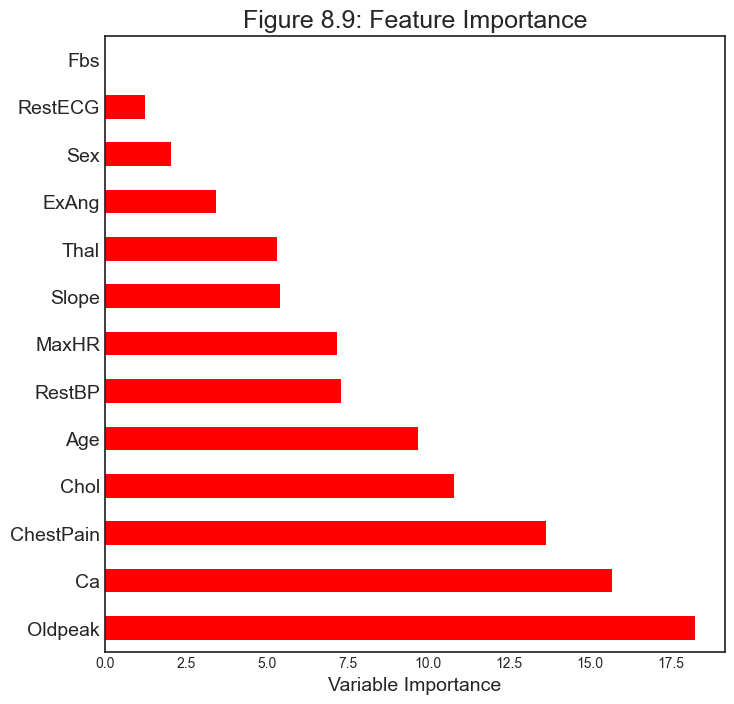

In [45]:
make_figure_8_9()

### Florestas aleatórias


Florestas aleatórias oferecem uma melhoria em relação às árvores ensacadas por meio de um pequeno ajuste que as descorrelaciona . Assim como no ensacamento, construímos uma série de árvores de decisão em amostras de treinamento bootstrapped. Mas, ao construir essas árvores de decisão, cada vez que uma divisão em uma árvore é considerada, uma amostra aleatória de
preditores são escolhidos como candidatos divididos do conjunto completo de
preditores. A divisão pode usar apenas um desses m preditores. Uma nova amostra de
os preditores são obtidos em cada divisão e, normalmente, escolhemos
— isto é, o número de preditores considerados em cada divisão é aproximadamente igual à raiz quadrada do número total de preditores

Em outras palavras, ao construir uma floresta aleatória, em cada divisão na árvore, o algoritmo não tem permissão nem para considerar a maioria dos preditores disponíveis. Isso pode parecer loucura, mas tem uma justificativa inteligente. Suponha que haja um preditor muito forte no conjunto de dados, juntamente com vários outros preditores moderadamente fortes. Então, na coleção de árvores ensacadas, a maioria ou todas as árvores usarão esse preditor forte na divisão superior. Consequentemente, todas as árvores ensacadas parecerão bastante semelhantes entre si. Portanto, as previsões das árvores ensacadas serão altamente correlacionadas. Infelizmente, a média de muitas quantidades altamente correlacionadas não leva a uma redução tão grande na variância quanto a média de muitas quantidades não correlacionadas. Em particular, isso significa que o ensacamento não levará a uma redução substancial na variância em uma única árvore nesse cenário.

Florestas aleatórias superam esse problema forçando cada divisão a considerar apenas um subconjunto dos preditores .

Vamos dividir os dados em 2 e calcular o teste e a estimativa
, tanto para florestas quanto para árvores.

In [46]:
import warnings
warnings.simplefilter('ignore')

# Init (takes a lot of time with J=30)
params = range(2,50)
forest_scores = np.zeros((len(params),2))
J = 30

# Loop over parameters
for i, k in enumerate(params):
    print("Computing k=%1.0f" % k, end ="")
    
    # Repeat J 
    temp_scores = np.zeros((J,2))
    for j in range(J):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=j)
        forest = RandomForestClassifier(n_estimators=k, oob_score=True, max_features="sqrt")
        forest.fit(X2_train,y2_train)
        temp_scores[j,0] = forest.score(X2_test, y2_test)
        temp_scores[j,1] = forest.oob_score_
        
    # Average
    forest_scores[i,:] = np.mean(temp_scores, axis=0)
    print("", end="\r")

In [47]:
# Figure 8.8
def make_figure_8_8():
    
    # Init
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    ax.set_title('Figure 8.8');

    # Plot scores
    ax.plot(params, bagging_scores);
    ax.plot(params, forest_scores);
    ax.legend(['Test - Bagging','OOB - Bagging', 'Test - Forest','OOB - Forest']);
    ax.set_xlabel('Number of Trees'); ax.set_ylabel('R^2');

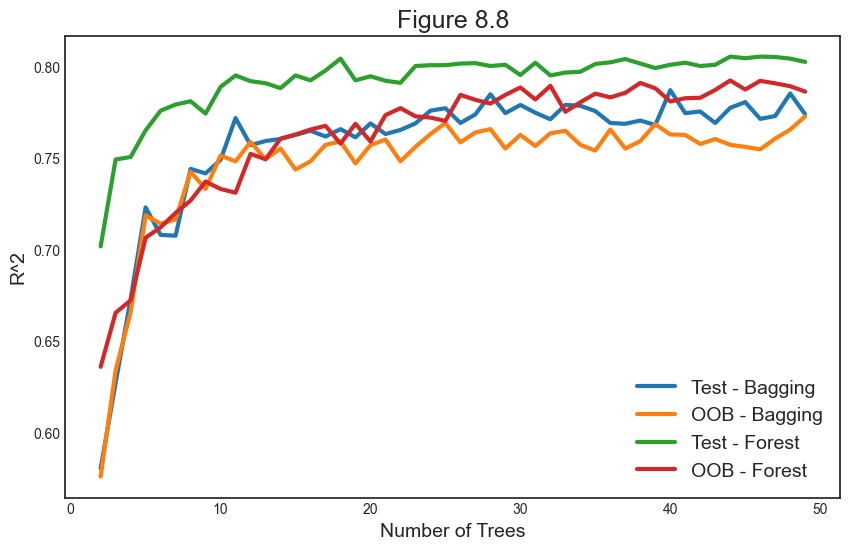

In [48]:
make_figure_8_8()

Quanto ao ensacamento, podemos traçar a importância do recurso.

In [49]:
# Make new figure 2
def make_new_figure_2():
    
    # Init
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

    # Plot feature importance - Bagging
    h1 = pd.DataFrame({'Importance':feature_importances*100}, index=features)
    h1 = h1.sort_values(by='Importance', axis=0, ascending=False)
    h1.plot(kind='barh', color='r', ax=ax1)
    ax1.set_xlabel('Variable Importance'); 
    ax1.set_title('Tree Bagging')

    # Plot feature importance
    h2 = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=features)
    h2 = h2.sort_values(by='Importance', axis=0, ascending=False)
    h2.plot(kind='barh', color='r', ax=ax2)
    ax2.set_title('Random Forest')

    # All plots
    for ax in fig.axes:
        ax.set_xlabel('Variable Importance'); 
        ax.legend([])

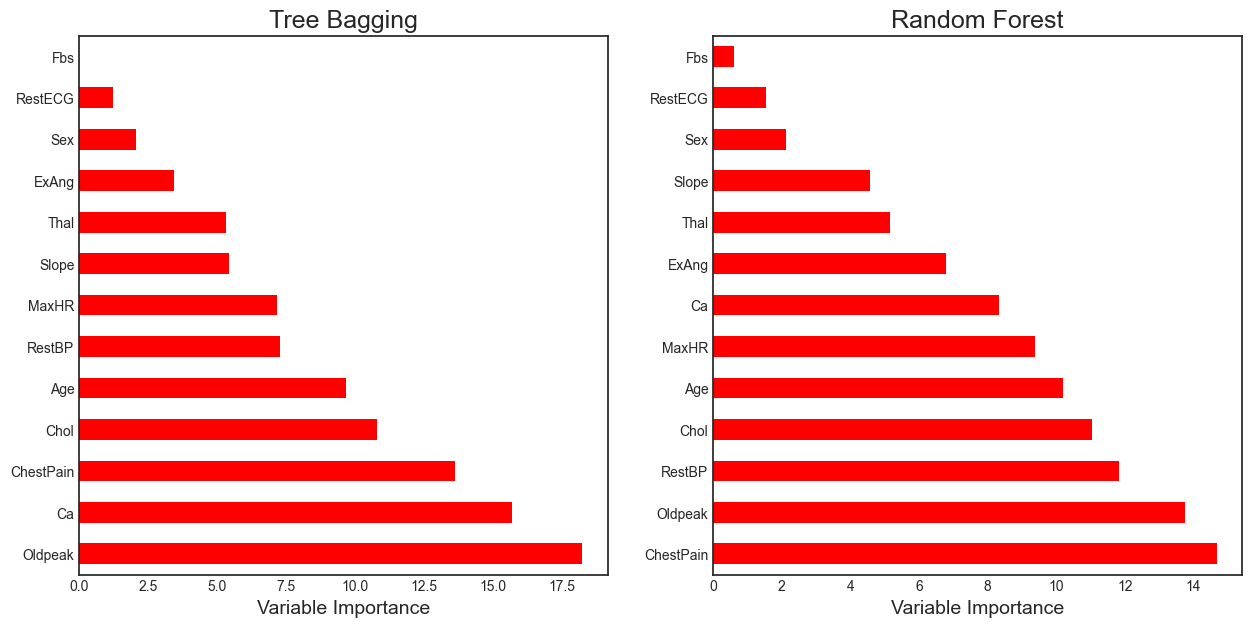

In [50]:
make_new_figure_2()

Na figura, observamos que a classificação de importância das variáveis ​​é semelhante à do bagging e das florestas aleatórias, mas há diferenças significativas.

Agora, vamos analisar a importância das florestas aleatórias usando o Khanconjunto de dados genéticos. Este conjunto de dados tem a peculiaridade de possuir um grande número de características e pouquíssimas observações.

In [51]:
# Load data
gene = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Khan.csv')
print(len(gene))
gene.head()

83


,x,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V2299,V2300,V2301,V2302,V2303,V2304,V2305,V2306,V2307,V2308
0,2,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,...,-0.238511,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172
1,2,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,...,-0.657394,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395
2,2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,...,-0.696352,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434
3,2,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,...,0.259746,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483
4,2,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,...,-0.200404,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966


5 linhas × 2309 colunas

O conjunto de dados tem 83 linhas e 2309 colunas.

Como é um conjunto de dados muito amplo , selecionar os recursos corretos é crucial.

Observe também que não podemos executar regressão linear neste conjunto de dados.

In [52]:
# Reduce dataset size
gene_small = gene.iloc[:,0:202]
X = gene_small.iloc[:,1:]
y = gene_small.iloc[:,0]

Vamos agora fazer uma validação cruzada sobre o número de árvores e o número máximo de recursos considerados.

In [53]:
# Init (takes a lot of time with J=30)
params = range(50,150,10)
m_scores = np.zeros((len(params),3))
p = np.shape(X)[1]
J = 30;

# Loop over parameters
for i, k in enumerate(params):
    
    # Array of features
    ms = [round(p/2), round(np.sqrt(p)), round(np.log(p))]
    
    # Repeat L times
    temp_scores = np.zeros((J,3))
    for j in range(J):
        print("Computing k=%1.0f (iter=%1.0f)" % (k,j+1), end ="")
    
        # Loop over values of m
        for index, m in enumerate(ms):
            forest = RandomForestClassifier(n_estimators=k, max_features=m, oob_score=True)
            forest.fit(X, y)
            temp_scores[j,index] = forest.oob_score_
        print("", end="\r")
            
    # Average
    m_scores[i,:] = np.mean(temp_scores, axis=0)

In [54]:
# Figure 8.10
def make_figure_8_10():
    
    # Init
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    ax.set_title('Figure 8.10');

    # Plot scores
    ax.plot(params, m_scores);
    ax.legend(['m=p/2','m=sqrt(p)','m=log(p)']);
    ax.set_xlabel('Number of Trees'); ax.set_ylabel('Test Classification Accuracy');

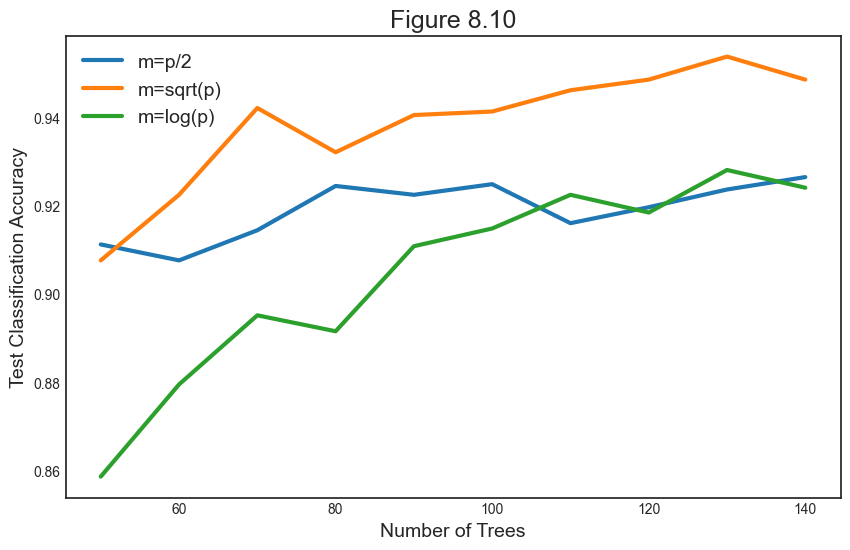

In [55]:
make_figure_8_10()

Parece que as melhores pontuações são alcançadas com poucos recursos e muitas árvores.

### Boosting (Impulsionando)

Assim como o bagging, o boosting é uma abordagem geral que pode ser aplicada a muitos métodos de aprendizado estatístico para regressão ou classificação. Aqui, restringimos nossa discussão sobre boosting ao contexto de árvores de decisão.

O boosting funciona de forma semelhante ao bagging, exceto que as árvores são cultivadas sequencialmente: cada árvore é cultivada usando informações de árvores cultivadas anteriormente. O boosting não envolve amostragem bootstrap; em vez disso, cada árvore é ajustada a uma versão modificada do conjunto de dados original.

Qual é a ideia por trás desse procedimento? Dado o modelo atual, ajustamos uma árvore de decisão aos resíduos do modelo. Ou seja, ajustamos uma árvore usando os resíduos atuais , em vez do resultado.
, como a resposta. Em seguida, adicionamos essa nova árvore de decisão à função ajustada para atualizar os resíduos. Cada uma dessas árvores pode ser bastante pequena, com apenas alguns nós terminais, determinados pelo parâmetro
no algoritmo. Ajustando pequenas árvores aos resíduos, melhoramos lentamente
em áreas onde não apresenta bom desempenho . O parâmetro de encolhimento λ retarda ainda mais o processo, permitindo que mais árvores, com formatos diferentes, ataquem os resíduos. Em geral, abordagens de aprendizado estatístico que aprendem lentamente tendem a apresentar bom desempenho.

Algoritmo
O algoritmo de reforço funciona da seguinte maneira:

Definir
e
para todos
no conjunto de treinamento.

Para
repita:

a. Encaixe uma árvore
com
divisões (
nós terminais) para os dados de treinamento
.

b. Atualização
adicionando uma versão reduzida da nova árvore:

c. Atualizar os resíduos

Saída do modelo impulsionado

O Boosting tem três parâmetros de ajuste:

O número de árvores 
O parâmetro de encolhimento 
. Isso controla a taxa de aprendizado do boosting.
O número de divisões em cada árvore 
, que controla a complexidade do conjunto reforçado. Frequentemente, d = 1 funciona bem, caso em que cada árvore é um toco, consistindo em uma única divisão.

In [56]:
# Init , oob_score=True
params = range(50,150,10)
boost_scores = np.zeros((len(params),3))
p = np.shape(X)[1]
J = 30

# Loop over parameters
for i, k in enumerate(params):
    
    # Repeat L times
    temp_scores = np.zeros((J,3))
    for j in range(J):
        print("Computing k=%1.0f (iter=%1.0f)" % (k,j+1), end ="")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=j)
    
        # First score: random forest
        forest = RandomForestClassifier(n_estimators=k, max_features="sqrt")
        forest.fit(X_train, y_train)
        temp_scores[j,0] = forest.score(X_test, y_test)

        # Second score: boosting with 1-split trees
        boost1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=k, max_features="sqrt")
        boost1.fit(X_train, y_train)
        temp_scores[j,1] = boost1.score(X_test, y_test)

        # Third score: boosting with 1-split trees
        boost2 = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=k, max_features="sqrt")
        boost2.fit(X_train, y_train)
        temp_scores[j,2] = boost2.score(X_test, y_test)
        print("", end="\r")
    
    # Average
    boost_scores[i,:] = np.mean(temp_scores, axis=0)

Vamos comparar boosting e floresta.

In [57]:
# Figure 8.11
def make_figure_8_11():
    
    # Init
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    ax.set_title('Figure 8.11');

    # Plot scores
    ax.plot(params, m_scores);
    ax.legend(['forest','boosting with d=1','boosting with d=2']);
    ax.set_xlabel('Number of Trees'); ax.set_ylabel('Test Classification Accuracy');

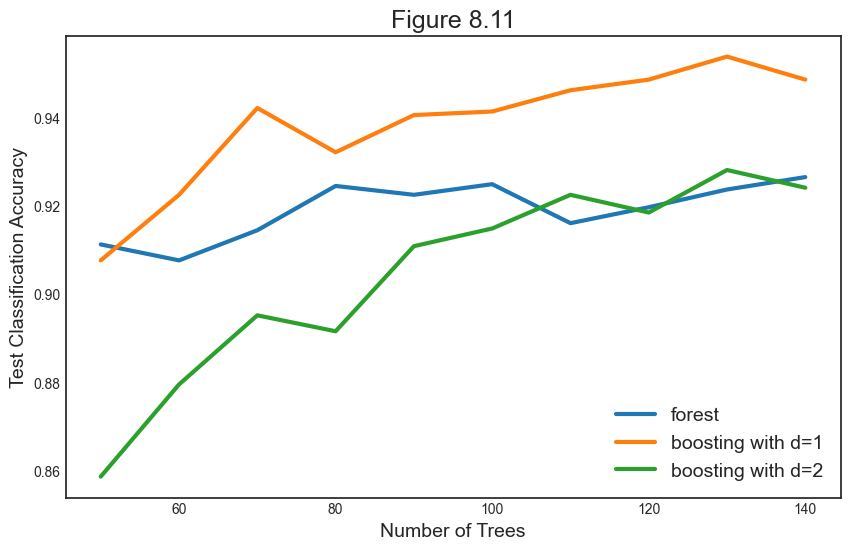

In [58]:
make_figure_8_11()